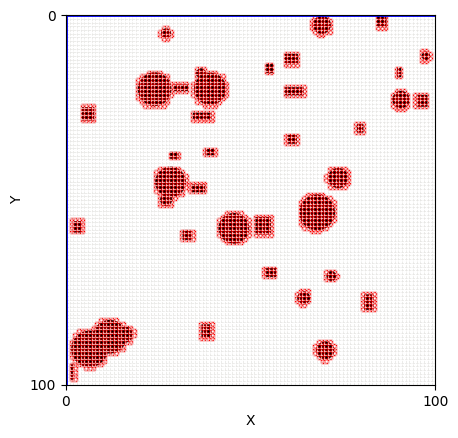

In [1]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from a_star.explorer import Explorer
from a_star.search import astar_search, path_states, dynamic_weighted_astar_search
import time

map = Map(image_path='./generated_images/generated_image_15.png', grid_size=10)
map.draw_coordinate_system()

In [2]:
initial=(0,0)
goal=(map.x_lim - 1, map.y_lim -1)

# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 482
Elapsed Time: 0.01689291000366211 seconds
path length = 109


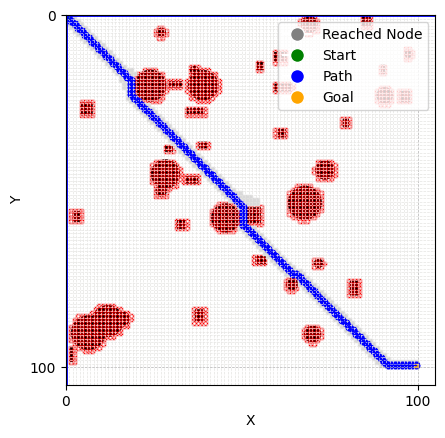

In [3]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")

states = path_states(node)
print('path length =', len(states))
explorer.get_reached()
map.draw_path_found(states, initial, goal, explorer.get_reached())

Reached: 466
Elapsed Time: 0.011235237121582031 seconds
path length = 109


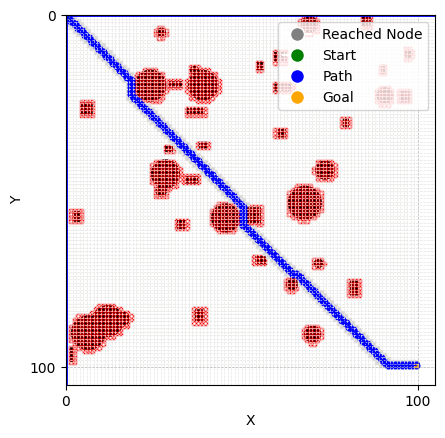

In [4]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")
path = path_states(node)
print('path length =', len(states))
map.draw_path_found(states, initial, goal, explorer.get_reached())

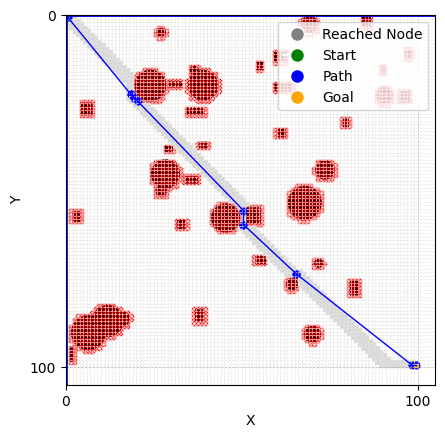

In [5]:
from path_smooth.path_smooth import simplify_path
simplified_path = simplify_path(path, map)
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())

In [6]:
from genetic.genetic import genetic

mean_path_value, mean_smooth_value, mean_fit_value, best_path = genetic(
    map, start=initial, end=goal,
    max_generation=100, initial_population_size=10, 
    weight_length=10, weight_smooth=1000,
    p_crossover=0.8, p_mutation=0.05, verbose=True)


Finish Ant colony optimization, size of initial population:  81
------------Generation 1 -----------------
Population size:  81
Before selection, population size:  81
After selection, population size:  80
Before crossover, two first parents: 
[0, 101, 201, 302, 403, 304, 405, 406, 306, 407, 408, 409, 309, 410, 311, 212, 313, 214, 213, 312, 412, 511, 510, 610, 710, 811, 911, 812, 913, 1014, 1114, 1113, 1213, 1214, 1315, 1415, 1414, 1413, 1314, 1215, 1116, 1017, 1018, 1019, 920, 819, 919, 918, 917, 916, 1015, 915, 816, 717, 718, 818, 817, 716, 715, 714, 815, 814, 914, 1013, 1112, 1011, 1110, 1109, 1008, 1009, 909, 809, 908, 907, 1007, 906, 805, 705, 604, 703, 602, 701, 600, 601, 500, 401, 402, 501, 400, 300, 200, 301, 202, 103, 4, 105, 205, 305, 206, 207, 108, 209, 310, 211, 112, 113, 114, 215, 116, 217, 218, 219, 118, 117, 18, 19, 120, 221, 320, 420, 421, 321, 422, 522, 623, 722, 821, 820, 720, 721, 621, 622, 523, 424, 325, 226, 227, 328, 429, 530, 630, 731, 732, 633, 634, 635, 736, 636

/Users/haily/Documents/GitHub/mobile_robot_path_planning/genetic/cal_smooth_value.py:15: RuntimeWarning: invalid value encountered in arccos
  angle_radians = np.arccos(cosine_theta)


After deletion: [0, 227, 328, 429, 529, 628, 727, 1417, 2318, 2419, 2520, 3233, 3058, 3162, 3263, 4569, 4770, 4871, 4972, 4974, 7492, 9999]
Mean fit_value:  -440378.89913689945
Mean path_value:  178.14965394968704
Mean smooth_value:  438.5974025974026
Best path:  [0, 1324, 1343, 1751, 5257, 7961, 9366, 9468, 9999]
------------Generation 5 -----------------
Population size:  77
Before selection, population size:  77
After selection, population size:  76
Before crossover, two first parents: 
[0, 1424, 1431, 1732, 1833, 2333, 2928, 3631, 4136, 4439, 5257, 7861, 8162, 8374, 9999]
[0, 1424, 1426, 1528, 1732, 1833, 2333, 2328, 3632, 3936, 3853, 3058, 3162, 3263, 4569, 4770, 4778, 4077, 4069, 4755, 5348, 5449, 5550, 5950, 6051, 6684, 9999]
After crossover, two first parents: 
[0, 1424, 1431, 1732, 1833, 2333, 2328, 3632, 3936, 3853, 3058, 3162, 3263, 4569, 4770, 4778, 4077, 4069, 4755, 5348, 5449, 5550, 5950, 6051, 6684, 9999]
[0, 1424, 1426, 1528, 1732, 1833, 2333, 2928, 3631, 4136, 4439, 52

/Users/haily/Documents/GitHub/mobile_robot_path_planning/genetic/cal_smooth_value.py:12: RuntimeWarning: invalid value encountered in scalar divide
  cosine_theta = dot_product / (norm_BA * norm_BC)


After deletion: [0, 227, 328, 429, 1344, 2853, 3658, 4669, 4770, 4778, 7484, 8984, 9773, 9467, 9258, 8766, 8775, 9999]
Mean fit_value:  -271921.6576919691
Mean path_value:  172.44745933775852
Mean smooth_value:  270.19718309859155
Best path:  [0, 1324, 1343, 1751, 5257, 7961, 9366, 9567, 9999]
------------Generation 11 -----------------
Population size:  71
Before selection, population size:  71
After selection, population size:  70
Before crossover, two first parents: 
[0, 227, 328, 429, 1343, 1753, 3858, 6560, 7269, 8679, 9999]
[0, 1324, 732, 365, 2265, 4469, 4570, 4770, 4871, 4972, 4974, 7492, 9999]
After crossover, two first parents: 
[0, 227, 328, 429, 1343, 1753, 3858, 6560, 7269, 8679, 9999]
[0, 1324, 732, 365, 2265, 4469, 4570, 4770, 4871, 4972, 4974, 7492, 9999]
Before mutation: [0, 227, 328, 429, 1343, 1753, 3858, 6560, 7269, 8679, 9999]
After mutation: [0, 524, 625, 726, 1431, 1732, 1833, 2133, 2529, 2540, 2940, 3531, 4136, 4439, 5257, 6162, 6385, 9999]
Before insertion: [0,

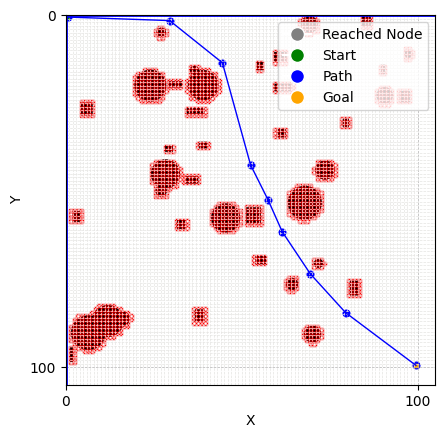

In [8]:
from genetic.genetic import convert_path_to_xy
G = map.get_grid_matrix()
cols = G.shape[1]
map.draw_path_found(convert_path_to_xy(best_path[-1], cols), initial, goal, [])